# Modelleren - analyse opdracht

## Simulatie basis model

- dm/dt = -m(r0 - c) + c - kel/koff * m
- dc/dt = m(r0 - c) - c

In [2]:
# prepare environment
import numpy as np
import matplotlib.pyplot as plt

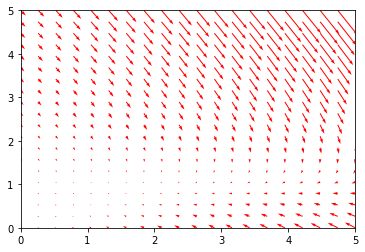

In [3]:
# https://kitchingroup.cheme.cmu.edu/blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

# function that calculates dm/dt and dc/dt
def ddt(t, m, c, r0, kel, koff):
    dmdt = -m*(r0 - c) + c - (kel/koff) * m
    dcdt = m*(r0 - c) - c
    return [dmdt, dcdt]

# function that produces phase plane 
def pplane(t0, m_max, c_max, r0, kel, koff):
    # grid of values for m and c
    m = np.linspace(0, m_max, 20)
    c = np.linspace(0, c_max, 20)

    # matrices/arrays to save outcomes 
    M, C = np.meshgrid(m, c)
    u, v = np.zeros(M.shape), np.zeros(C.shape)

    # calculate values for grid of m,c
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            x = M[i,j]
            y = C[i,j]
            yprime = ddt(t0, x, y, r0, kel, koff)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    # plot phase plane 
    Q = plt.quiver(M, C, u, v, color = 'r')
    plt.xlim([0,m_max])
    plt.ylim([0,c_max])
    plt.xlabel = ('m')
    plt.ylabel = ('c')

# test function 
pplane(0, 5, 5, 1, 1, 1)

In [4]:
# function for RK4 
def RK4_M(t0, m0, c0, r0, kel, koff, tn, n):
    # step size 
    h = (tn - t0)/n
    
    # create vectors to save iterations 
    t = np.zeros(n+1) 
    t[0] = t0
    
    m = np.zeros(n+1)
    m[0] = m0
    
    c = np.zeros(n+1) 
    c[0] = c0
    
    # perform RK4
    for i in range(n):
        k1_m, k1_c = np.multiply(ddt(t[i], m[i], c[i], r0, kel, koff), h)
        k2_m, k2_c = np.multiply(ddt(t[i]+h/2, m[i]+k1_m/2, c[i]+k1_c/2, r0, kel, koff), h)
        k3_m, k3_c = np.multiply(ddt(t[i]+h/2, m[i]+k2_m/2, c[i]+k2_c/2, r0, kel, koff), h)
        k4_m, k4_c = np.multiply(ddt(t[i]+h, m[i]+k3_m, c[i]+k3_c, r0, kel, koff), h)
        k_m = (k1_m + 2*k2_m + 2*k3_m + k4_m)/6
        k_c = (k1_c + 2*k2_c + 2*k3_c + k4_c)/6
        
        # set and save values 
        t[i+1] = t[i] + h
        m[i+1] = m[i] + k_m
        c[i+1] = c[i] + k_c
        
    return(t, m, c)

# function that creates graphs 
def sim_plot(t0, m0, c0, r0, kel, koff, tn, n, counter):
    time, med, com = RK4_M(t0, m0, c0, r0, kel, koff, tn, n)
    
    plt.figure(counter)
    plt.subplot(211)
    plt.plot(time, med) # plotting medication 
    # plt.ylabel('Medication')
    plt.xticks(color='w')
    plt.xlim(0, max(time))
    plt.ylim(0, m0)
    
    plt.subplot(212)
    plt.plot(time, com) # plotting complex
    # plt.xlabel('Time')
    # plt.ylabel('Complex')
    plt.xlim(0, max(time))
    plt.ylim(0, m0)

Trying the functions: 

In [8]:
# set starting values 
t0 = 0
m0 = 1
c0 = 0
r0 = 1
kel = 1
koff = 10 
tn = 20
n = 100

# try function 
RK4_M(t0, m0, c0, r0, kel, koff, tn, n)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
         2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
         4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
         6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
         8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
        11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
        13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
        15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
        17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
        19.8, 20. ]),
 array([1.        , 0.83144286, 0.7304557 , 0.6665145 , 0.62411642,
        0.59472315, 0.57337883, 0.55710656, 0.54407731, 0.53315019,
        0.52360623, 0.51498899, 0.50700704, 0.49947347, 0.49226779,
        0.48531193, 0.47855499, 0.47196347, 0.46551509, 0.45919476,
        0.45299206, 0.44689958, 0.440911

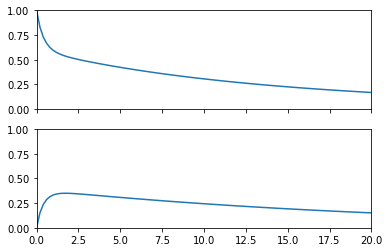

In [9]:
# plot simulation 
sim_plot(t0, m0, c0, r0, kel, koff, tn, n, 1)

### Performing simulation

Moeten het even hebben over welke waarden we voor willen simuleren, want we hebben zoveel variabelen waar we waarden voor kunnen kiezen, dat het aantal plots dat we maken de pan uit loopt.

In [ ]:
# starting values that stay the same throughout the simulations 
t0 = 0
c0 = 0
tn = 20
n = 100

# starting concentrations 
m0 = np.linspace(1, 5, 5)
r0 = np.linspace(0.5, 5, 5)

# rates 
kel = (0.01, 0.1, 1, 2, 5, 10) # de verhouding tussen kel/koff mag niet te groot worden, dan krijgen we nan values
koff = (1, 2, 5, 10)

# list to save plots 
plots = [None] * (len(m0)*len(r0)*len(kel)*len(koff))
counter = 0 

# make plots 
# for i in range(len(m0)):
#    for j in range(len(r0)):
#        for k in range (len(kel)):
#            for l in range(len(koff)):
#                plots[counter] = sim_plot(t0, m0[i], c0, r0[j], kel[k], koff[l], tn, n, counter)
#                counter = counter + 1 